## CIS 4526 Foundations of Machine Learning Fall 2024 Homework 1
### Due Date: 10/15 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

### This homework is on using all you have learned so far in model building to build a Linear Regression for a numerical target variables as well as a classfication problem.

***There are 2 parts in this homework. Make sure you follow the instructions and the proper model building workflow***


### Part 1 Predicting House Price

1. Load the dataset
2. Perform EDA on this dataset (no need to be extensive here)
3. Separate numerical features from categorical features
4. Build a one-factor Linear Regression model with the feature that has the highest correlation with the target variable
5. Print out the model performance metric (r-squared and mean squared error)
   (hint: calculate the adjusted r-square using the formula described in 
   [Link how to calculate adjusted r squared](
   https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn
   )
6. Check if the model passes cross-validation (either use our DIY method or use the cross_val_score from sklearn) 
   (hint: reference: https://scikit-learn.org/stable/modules/cross_validation.html )
7. Build a second model with all the features available
8. Print out the model performance metric (r-squared, adjusted r-square and mean squared error)
9. Check if the second model also pass cross-validation
10. Compare and comment on the performance of both models. Discuss whether adding additional features helps or not.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# 1. Load the dataset
df = pd.read_csv("data/USA_Housing.csv")
df.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
df.tail()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1060193.786,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1482617.729,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1030729.583,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1198656.872,USS Wallace\nFPO AE 73316
4999,65510.58180,5.992305,6.792336,4.07,46501.28380,1298950.480,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
# 2. Perform EDA on this dataset (no need to be extensive here)

In [7]:
# Check Missing Data
df.isnull().any()

Income                  False
HouseAge                False
NumberOfRooms           False
AreaNumberOfBedrooms    False
Population              False
Price                   False
Address                 False
dtype: bool

In [8]:
# Check Any Outliers in Numerical Fields: Income, HouseAge, NumberOfRooms, AreaNumberOfBedrooms, Population, Price

<Axes: xlabel='Income', ylabel='HouseAge'>

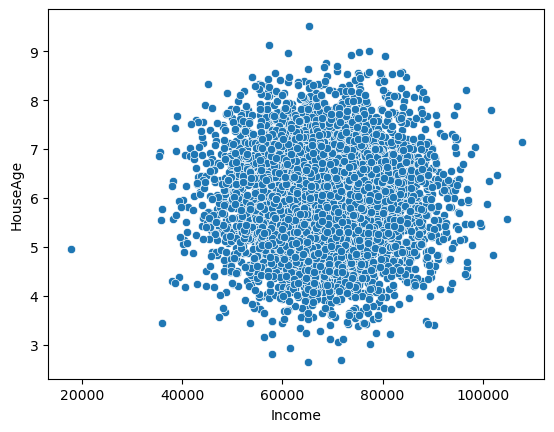

In [9]:
sns.scatterplot(x='Income', y='HouseAge', data=df)
# There is an outlier for Income at 20,000 

<Axes: xlabel='Income', ylabel='NumberOfRooms'>

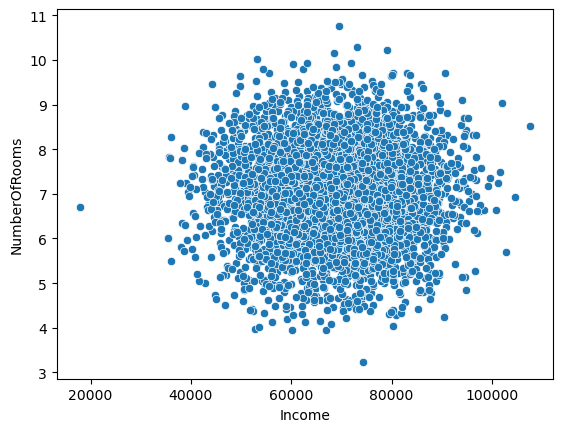

In [10]:
sns.scatterplot(x='Income', y='NumberOfRooms', data=df)
# Income at almost 80,000 with 3.5 NumberOfRooms could be an outlier

<Axes: xlabel='Income', ylabel='AreaNumberOfBedrooms'>

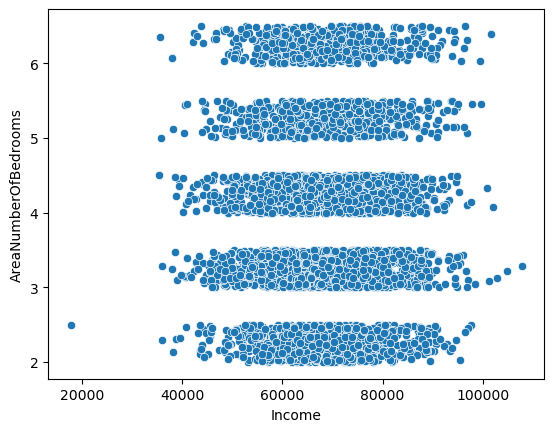

In [11]:
sns.scatterplot(x='Income', y='AreaNumberOfBedrooms', data=df)

<Axes: xlabel='Income', ylabel='Population'>

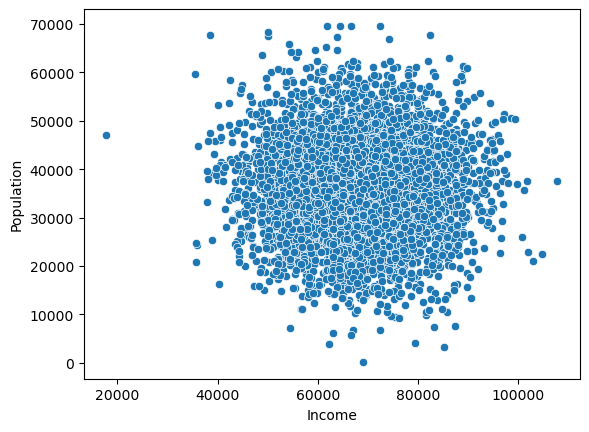

In [12]:
sns.scatterplot(x='Income', y='Population', data=df)

<Axes: xlabel='Income', ylabel='Price'>

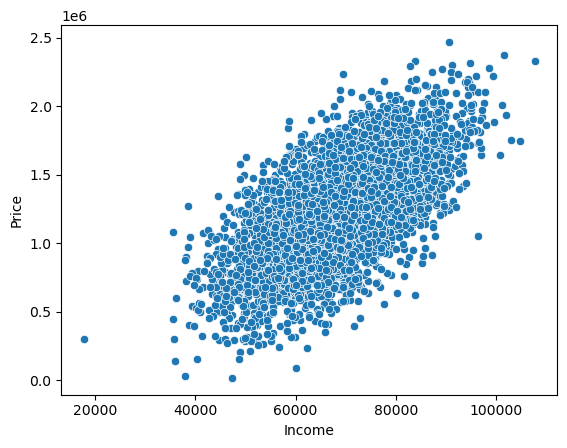

In [13]:
sns.scatterplot(x='Income', y='Price', data=df)

<Axes: ylabel='Income'>

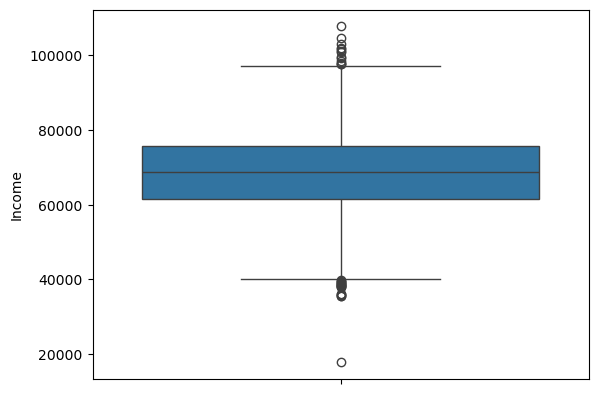

In [14]:
sns.boxplot(y=df['Income'])

<Axes: ylabel='Income'>

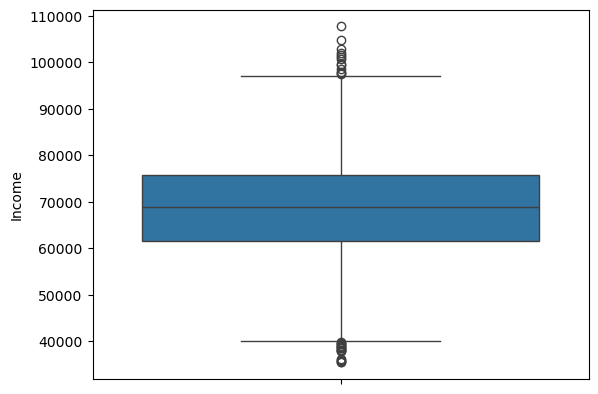

In [15]:
# Remove 20,000 Income outlier
df = df[ df['Income'] > 25000]
sns.boxplot(y=df['Income'])

<Axes: ylabel='HouseAge'>

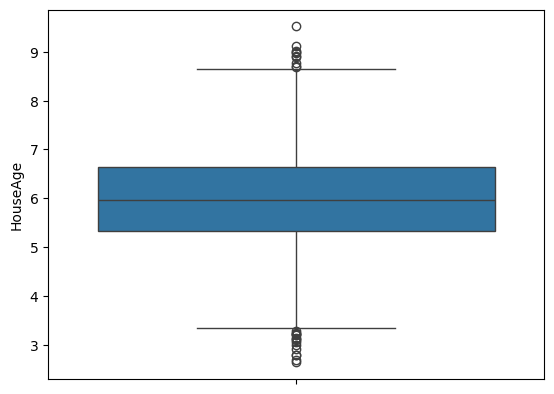

In [16]:
sns.boxplot(y=df['HouseAge'])

<Axes: ylabel='NumberOfRooms'>

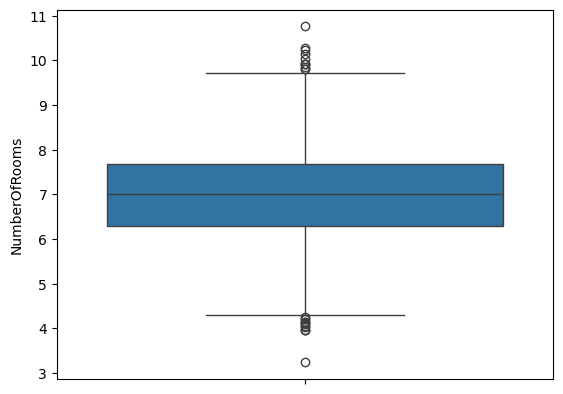

In [17]:
sns.boxplot(y=df['NumberOfRooms'])

<Axes: ylabel='NumberOfRooms'>

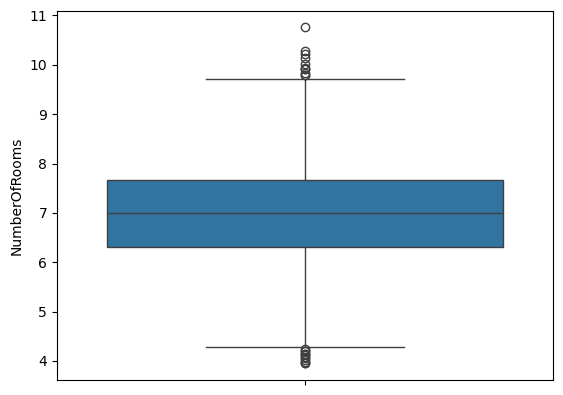

In [18]:
# Remove 3 NumberOfRooms Outlier
df = df[ df['NumberOfRooms'] > 3.5]
sns.boxplot(y=df['NumberOfRooms'])

<Axes: ylabel='AreaNumberOfBedrooms'>

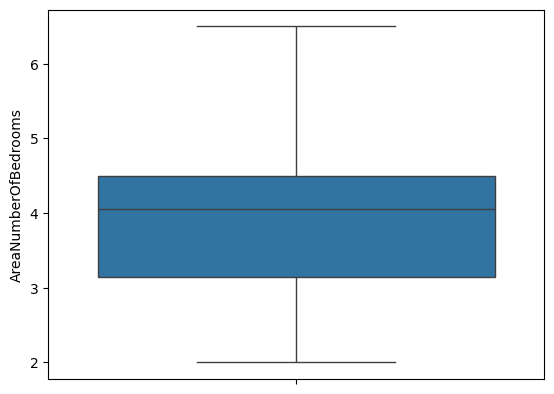

In [19]:
sns.boxplot(y=df['AreaNumberOfBedrooms'])

<Axes: ylabel='Population'>

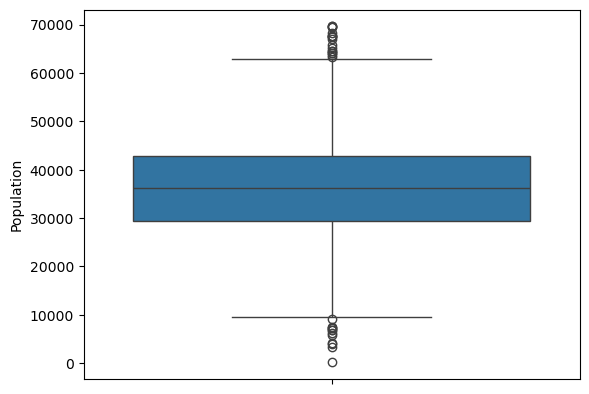

In [20]:
sns.boxplot(y=df['Population'])

<Axes: ylabel='Price'>

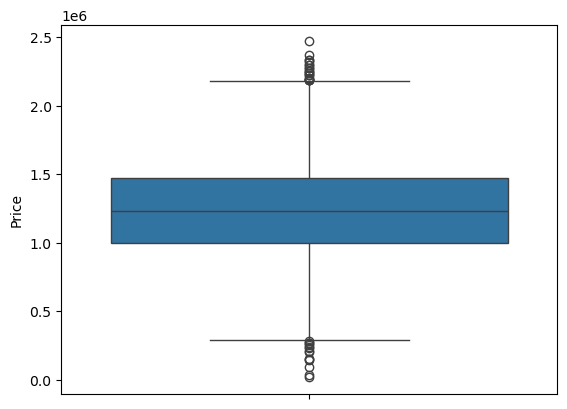

In [21]:
sns.boxplot(y=df['Price'])

In [22]:
# 3. Separate numerical features from categorical features
numerical_features = df[["Income", "HouseAge", "NumberOfRooms", "AreaNumberOfBedrooms", "Population", "Price"]]
categorical_features = df[["Address"]]

In [23]:
# 4. Build a one-factor Linear Regression model with the feature that has the highest correlation with the target variable
df.corr(method='pearson', min_periods=1, numeric_only=True) # Price has the highest correlation with income

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.003112,-0.010934,0.018739,-0.015369,0.639106
HouseAge,-0.003112,1.000000,-0.008739,0.005995,-0.018812,0.452336
NumberOfRooms,-0.010934,-0.008739,1.000000,0.463014,0.003164,0.336511
AreaNumberOfBedrooms,0.018739,0.005995,0.463014,1.000000,-0.021783,0.170622
Population,-0.015369,-0.018812,0.003164,-0.021783,1.000000,0.409455
Price,0.639106,0.452336,0.336511,0.170622,0.409455,1.000000


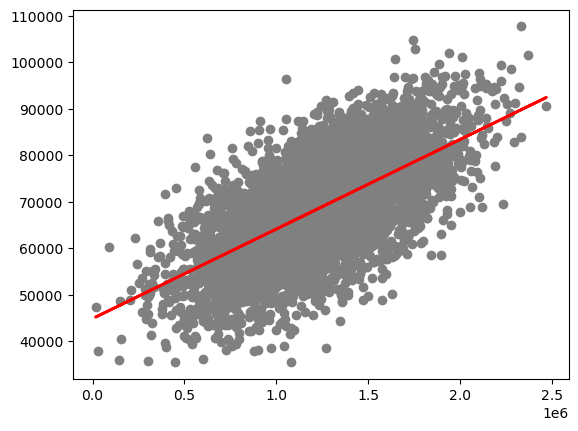

X: Price | Y: Income
Model Intercept: [44860.47583999]
Model Coefficient: [[0.01925908]]


In [24]:
from sklearn.linear_model import LinearRegression

X = df['Price'].values
Y = df['Income'].values

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

model = LinearRegression()
model.fit(X,Y)

Y_pred = model.predict(X)

plt.scatter(X,Y, color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

print("X: Price | Y: Income")
print("Model Intercept: {}".format(model.intercept_))
print("Model Coefficient: {}".format(model.coef_))

In [25]:
# 5. Print out the model performance metric (r-squared and mean squared error) (hint: calculate the adjusted r-square 
# using the formula described in Link how to calculate adjusted r squared

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

n = len(X_test) # Number of samples
p = X_test.shape[1] # Numbers of features

r2 = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
                               
print('R-Squared:', r2)
print('Mean Squared Error:', mse)
print('Adjusted R-Square:', adjusted_r2)

R-Squared: 0.39188911109453495
Mean Squared Error: 70248580.15510412
Adjusted R-Square: 0.3912797815465334


Trial 0, R-squared: 0.3756535348263468,  
Trial 1, R-squared: 0.39302540419979415,  
Trial 2, R-squared: 0.41497090475531895,  
Trial 3, R-squared: 0.3984977784108493,  
Trial 4, R-squared: 0.3951560717159107,  
Trial 5, R-squared: 0.3957175116649243,  
Trial 6, R-squared: 0.4224253852878581,  
Trial 7, R-squared: 0.42220717568090627,  
Trial 8, R-squared: 0.40062296357653593,  
Trial 9, R-squared: 0.3704292214061391,  


<Axes: xlabel='trial'>

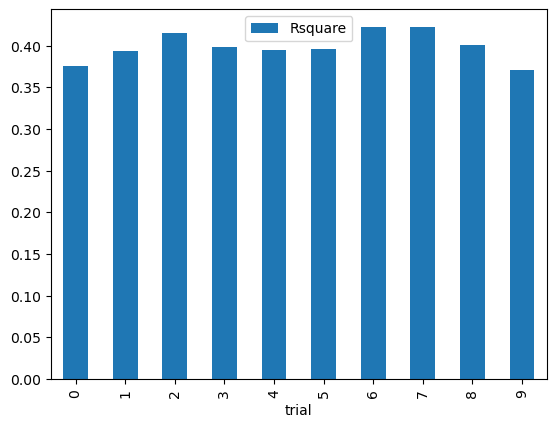

In [26]:
# 6. Check if the model passes cross-validation (either use our DIY method or use the cross_val_score from sklearn) 
# (hint: reference: https://scikit-learn.org/stable/modules/cross_validation.html )

# According to websites, above R^2 above 0.7 is good and below 0.4 is low correlation

rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  '.format(i, metrics.r2_score(Y_test, Y_pred)))

rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [27]:
# 7. Build a second model with all the features available

X = df[["Price", "HouseAge", "NumberOfRooms", "AreaNumberOfBedrooms", "Population"]].values.reshape(-1, 5)
Y = df["Income"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model2 = LinearRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)

In [28]:
# 8. Print out the model performance metric (r-squared, adjusted r-square and mean squared error)

n = len(X_test) # Number of samples
p = X_test.shape[1] # Numbers of features

r2 = metrics.r2_score(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
                               
print('R-Squared:', r2)
print('Mean Squared Error:', mse)
print('Adjusted R-Square:', adjusted_r2)

R-Squared: 0.8386295055381513
Mean Squared Error: 18641416.09974399
Adjusted R-Square: 0.837817782728987


Trial 0, R-squared: 0.840846397009479,  
Trial 1, R-squared: 0.8371055669652234,  
Trial 2, R-squared: 0.8468232729682574,  
Trial 3, R-squared: 0.8313493338227049,  
Trial 4, R-squared: 0.846295746738563,  
Trial 5, R-squared: 0.8419910782162191,  
Trial 6, R-squared: 0.830889520004893,  
Trial 7, R-squared: 0.8340366938597541,  
Trial 8, R-squared: 0.8311487323975927,  
Trial 9, R-squared: 0.8515694961763959,  


<Axes: xlabel='trial'>

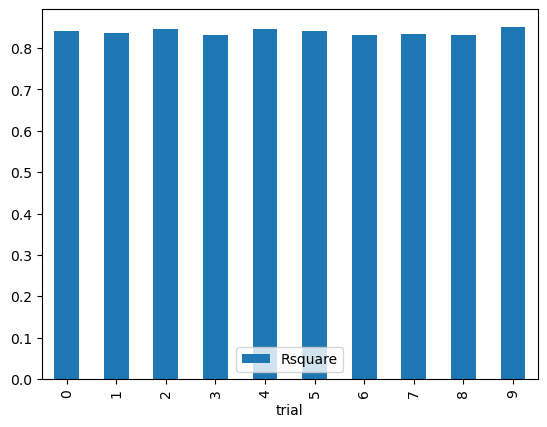

In [29]:
# 9. Check if the second model also pass cross-validation

# According to websites, above R^2 above 0.7 is good and below 0.4 is low correlation

rsquare = []
for i in range(10):
    X = df[["Price", "HouseAge", "NumberOfRooms", "AreaNumberOfBedrooms", "Population"]].values.reshape(-1, 5)
    Y = df["Income"].values.reshape(-1, 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = random.randint(1,1000))
    model2 = LinearRegression()
    model2.fit(X_train, Y_train)
    Y_pred = model2.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  '.format(i, metrics.r2_score(Y_test, Y_pred)))

rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [30]:
# 10. Compare and comment on the performance of both models. Discuss whether adding additional features helps or not.
#TODO

### Part 2 Build a Logistic model for predicting wine taste

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [31]:
df = pd.read_csv("data/wine-tasting-modified.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,good_taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,No
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,No
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,No
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,No
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,No


<Axes: xlabel='good_taste', ylabel='count'>

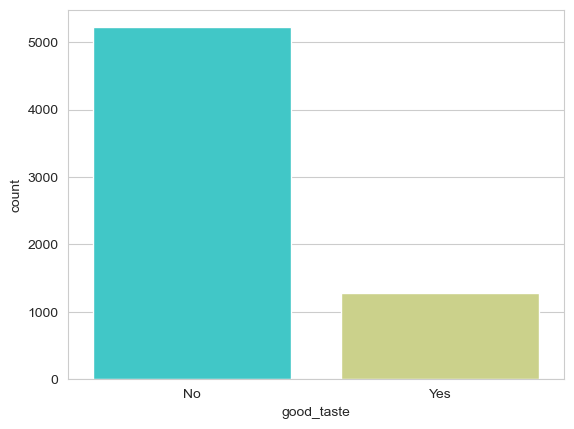

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='good_taste',data=df, palette='rainbow')

***This dataset has both the white and red wine***

<Axes: xlabel='good_taste', ylabel='count'>

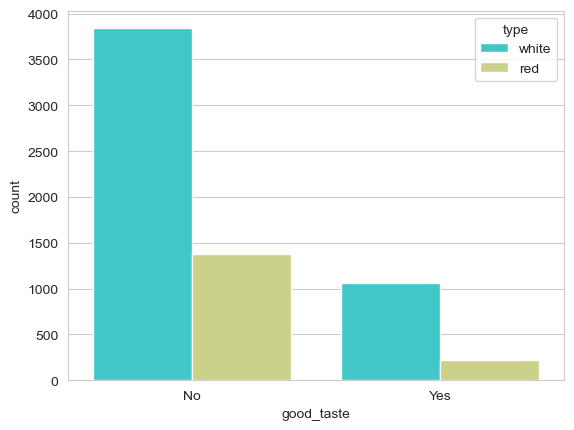

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='good_taste', hue='type', data=df, palette='rainbow')

<Axes: xlabel='good_taste', ylabel='count'>

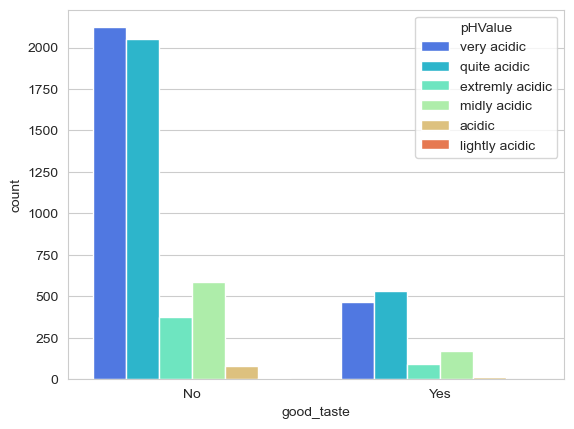

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='good_taste',hue='pHValue',data=df, palette='rainbow')

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste 

Follow standard machine learning workflow, in particular.

1. Perform EDA (fixing the missing values or outliers, if any)
2. separated features into numerical features versus categorical 
3. normalize numerical features if needed
4. use one-hot encoding to take care of categorical variables
5. Separated data set into training and testing, 
6. Build a logistic model using all features
7. examine the performance of your model
8. check if your model passes cross-validations 
9. Comment on the results of your model                                               

***Type your code and answers here***

In [35]:
# 1. Perform EDA (fixing the missing values or outliers, if any)

# Check Missing Data
df.isnull().any() # fixed acidity has null

fixed acidity            True
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
good_taste              False
dtype: bool

In [36]:
# Remove null row
df2 = df [ ~np.isnan(df['fixed acidity'])]
df2.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
good_taste              False
dtype: bool

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

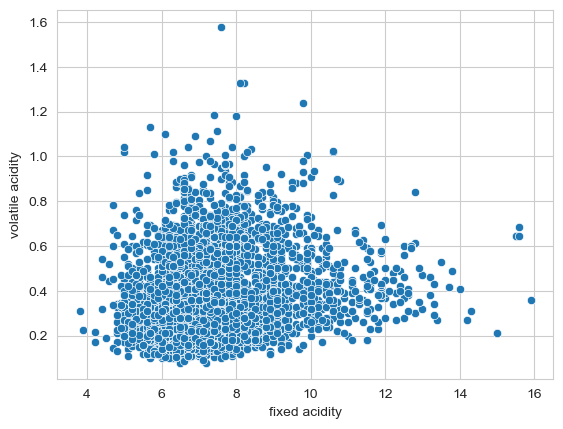

In [37]:
sns.scatterplot(x='fixed acidity', y='volatile acidity', data=df2)

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

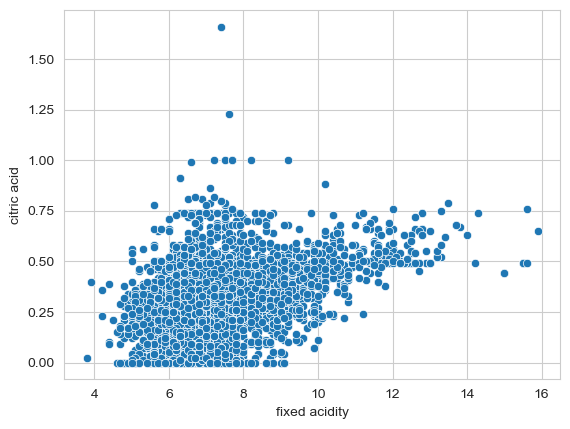

In [38]:
sns.scatterplot(x='fixed acidity', y='citric acid', data=df2)

<Axes: xlabel='fixed acidity', ylabel='residual sugar'>

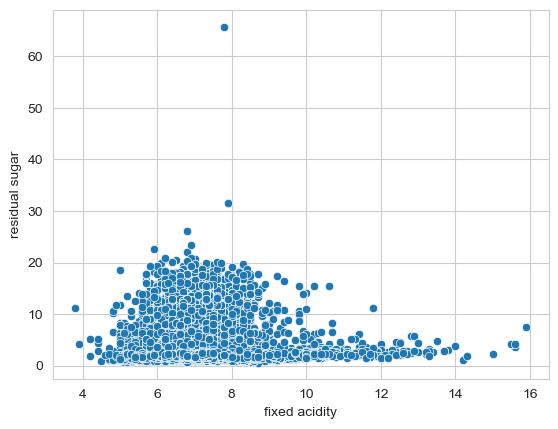

In [39]:
sns.scatterplot(x='fixed acidity', y='residual sugar', data=df2)

<Axes: xlabel='fixed acidity', ylabel='chlorides'>

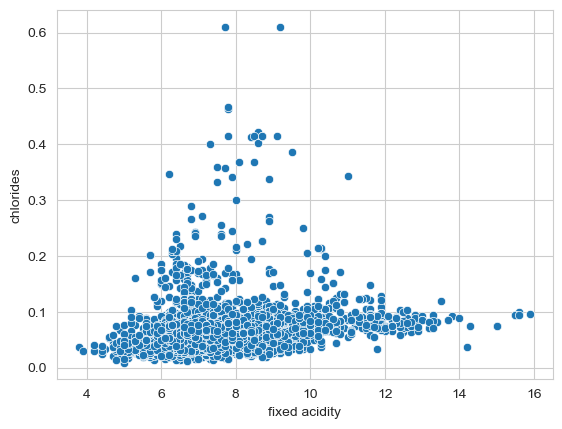

In [40]:
sns.scatterplot(x='fixed acidity', y='chlorides', data=df2)

<Axes: xlabel='fixed acidity', ylabel='free sulfur dioxide'>

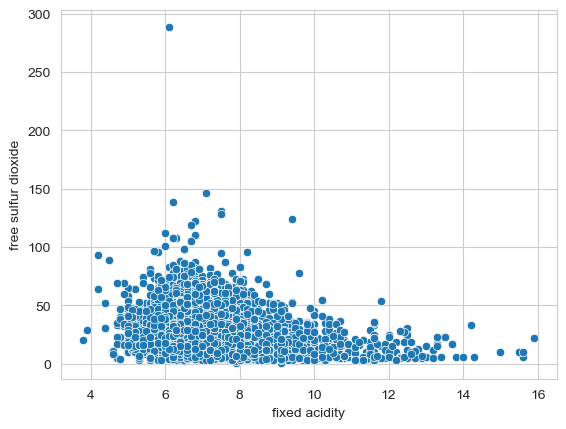

In [41]:
sns.scatterplot(x='fixed acidity', y='free sulfur dioxide', data=df2)

<Axes: xlabel='fixed acidity', ylabel='total sulfur dioxide'>

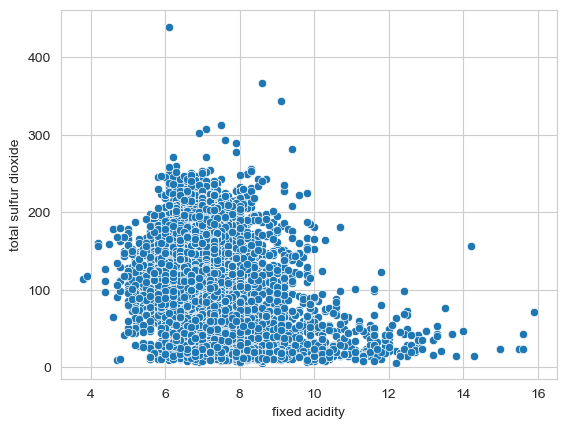

In [42]:
sns.scatterplot(x='fixed acidity', y='total sulfur dioxide', data=df2)

<Axes: xlabel='fixed acidity', ylabel='density'>

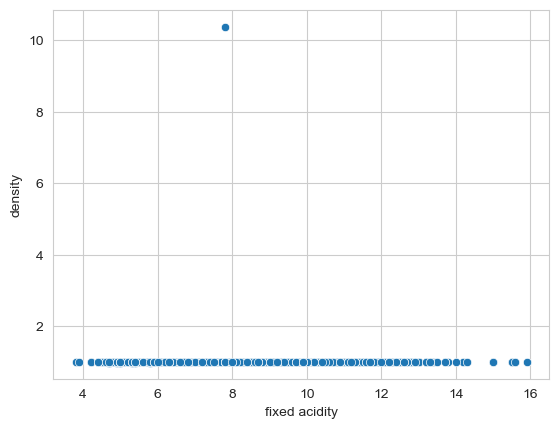

In [43]:
sns.scatterplot(x='fixed acidity', y='density', data=df2)

<Axes: xlabel='fixed acidity', ylabel='sulphates'>

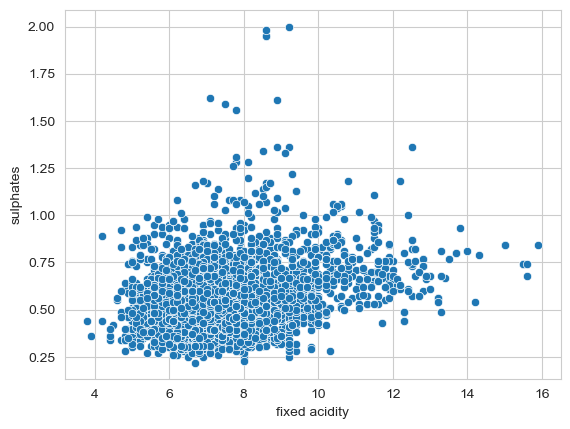

In [44]:
sns.scatterplot(x='fixed acidity', y='sulphates', data=df2)

<Axes: xlabel='fixed acidity', ylabel='alcohol'>

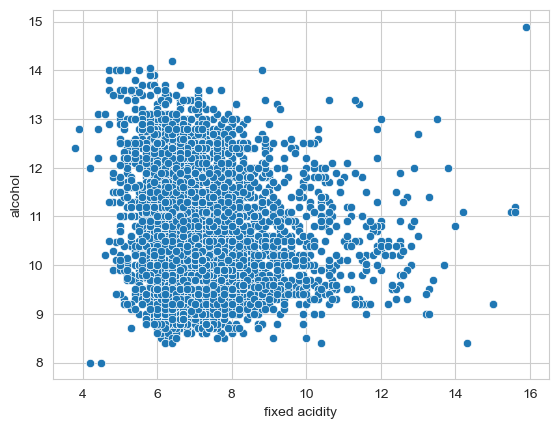

In [45]:
sns.scatterplot(x='fixed acidity', y='alcohol', data=df2)

<Axes: ylabel='fixed acidity'>

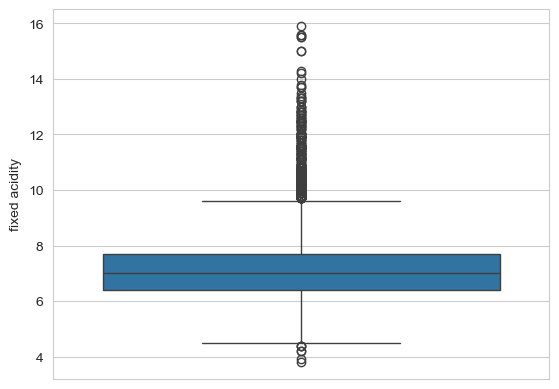

In [46]:
sns.boxplot(y=df2['fixed acidity'])

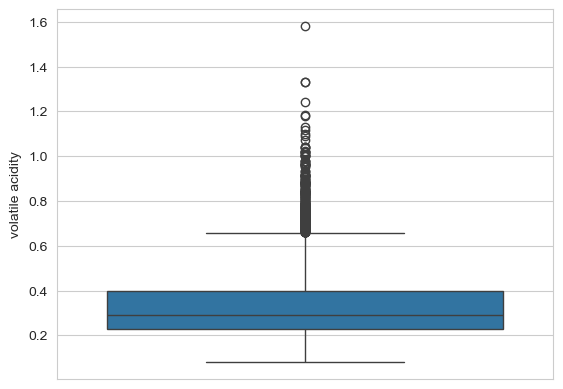

In [47]:
sns.boxplot(y=df2['volatile acidity'])
df2 = df2[ df2['volatile acidity'] < 1.4] # Removed Outlier

<Axes: ylabel='volatile acidity'>

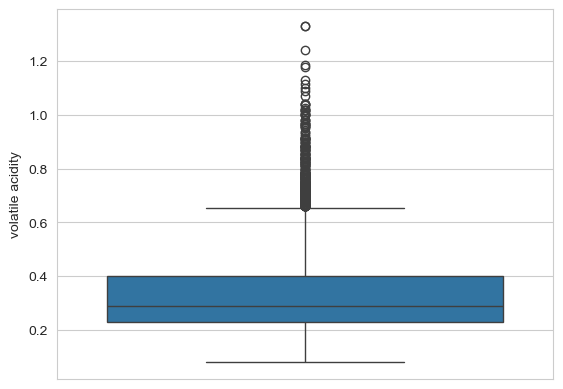

In [48]:
sns.boxplot(y=df2['volatile acidity'])

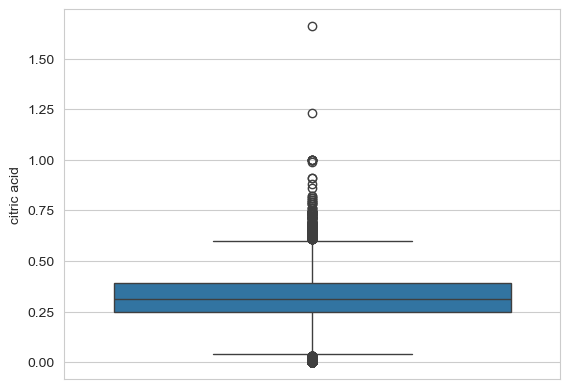

In [49]:
sns.boxplot(y=df2['citric acid'])
df2 = df2[ df2['citric acid'] < 1.20] # Removed Outlier

<Axes: ylabel='citric acid'>

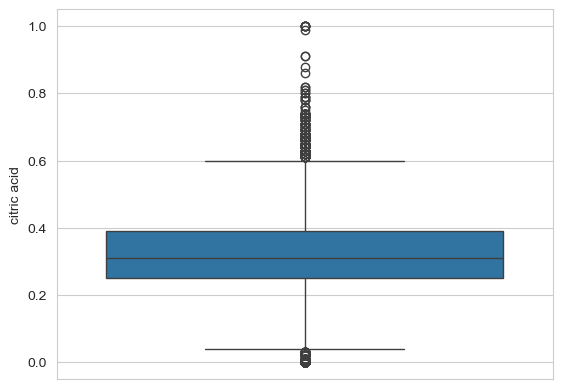

In [50]:
sns.boxplot(y=df2['citric acid'])

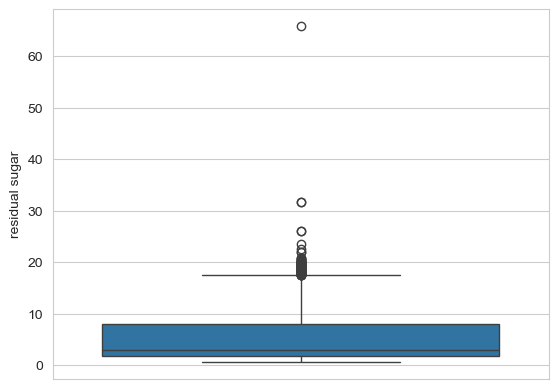

In [51]:
sns.boxplot(y=df2['residual sugar'])
df2 = df2[ df2['residual sugar'] < 60]

<Axes: ylabel='residual sugar'>

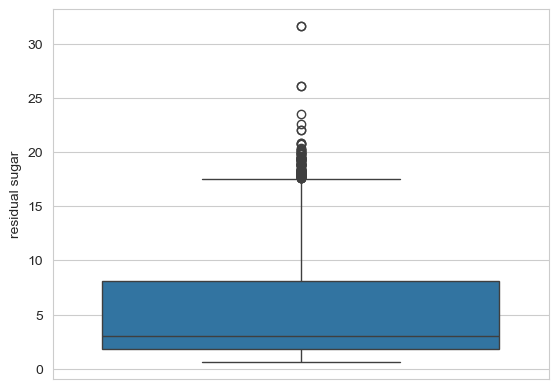

In [52]:
sns.boxplot(y=df2['residual sugar'])

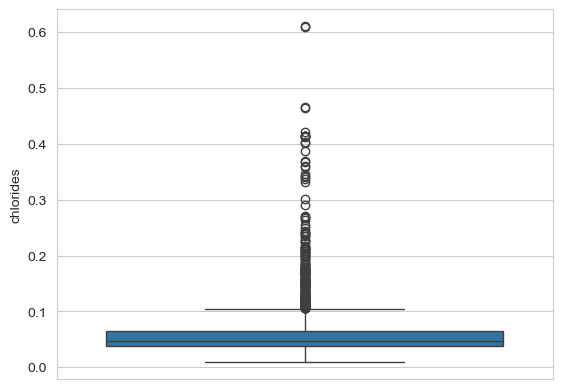

In [53]:
sns.boxplot(y=df2['chlorides'])
df2 = df2[ df2['chlorides'] < .5]

<Axes: ylabel='chlorides'>

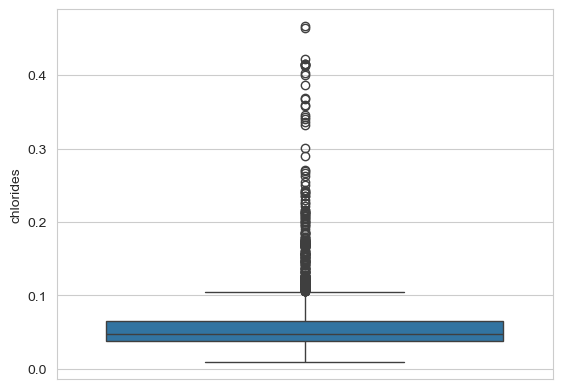

In [54]:
sns.boxplot(y=df2['chlorides'])

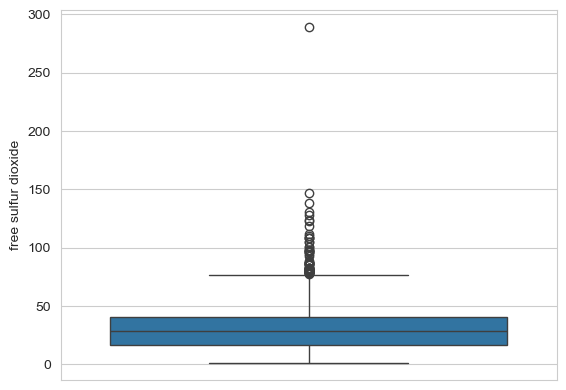

In [55]:
sns.boxplot(y=df2['free sulfur dioxide'])
df2 = df2[ df2['free sulfur dioxide'] < 250]

<Axes: ylabel='free sulfur dioxide'>

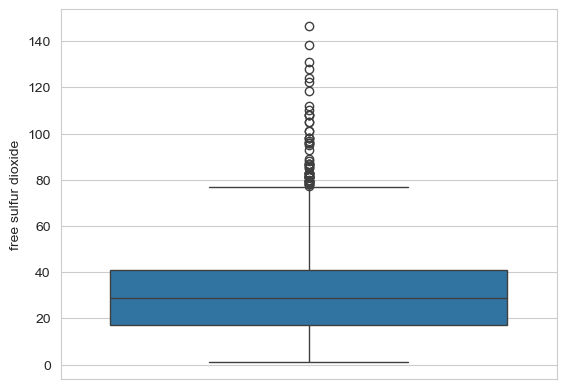

In [56]:
sns.boxplot(y=df2['free sulfur dioxide'])

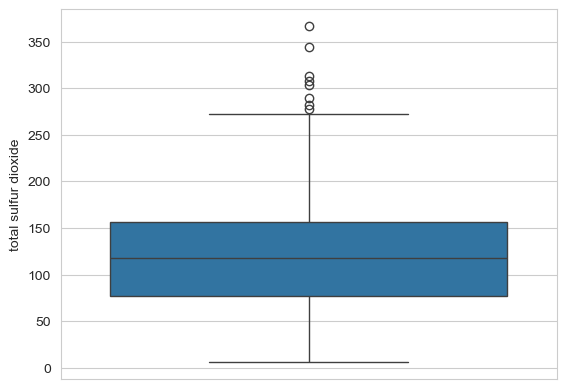

In [57]:
sns.boxplot(y=df2['total sulfur dioxide'])
df2 = df2[ df2['total sulfur dioxide'] < 400]

<Axes: ylabel='total sulfur dioxide'>

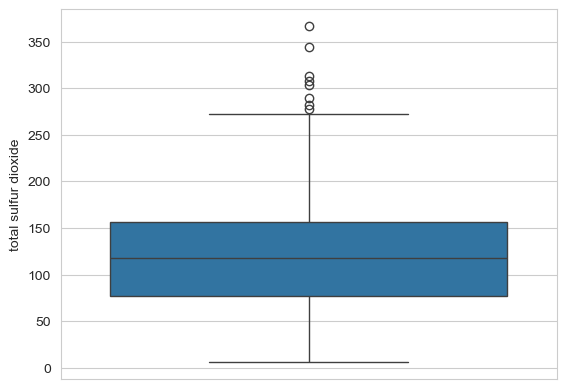

In [58]:
sns.boxplot(y=df2['total sulfur dioxide'])

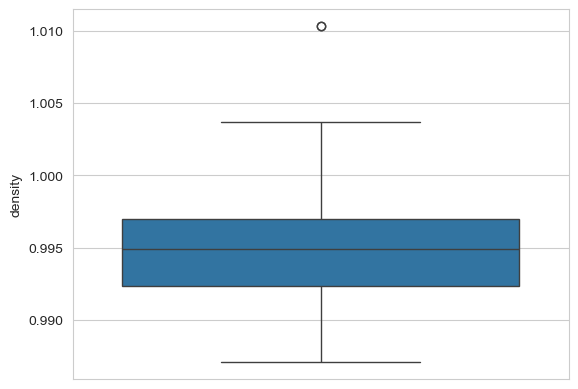

In [59]:
sns.boxplot(y=df2['density'])
df2 = df2[ df2['density'] < 2]

<Axes: ylabel='density'>

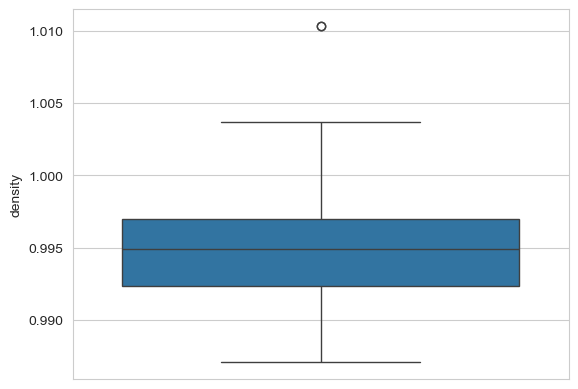

In [60]:
sns.boxplot(y=df2['density'])

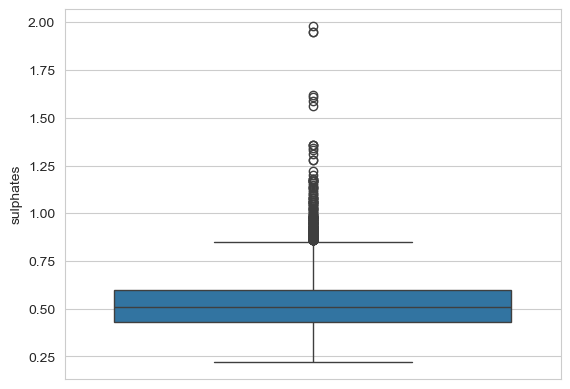

In [61]:
sns.boxplot(y=df2['sulphates'])
df2 = df2[ df2['sulphates'] < 1.75]

<Axes: ylabel='sulphates'>

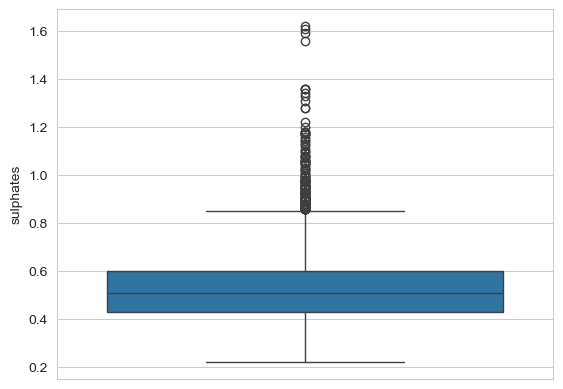

In [62]:
sns.boxplot(y=df2['sulphates'])

<Axes: ylabel='alcohol'>

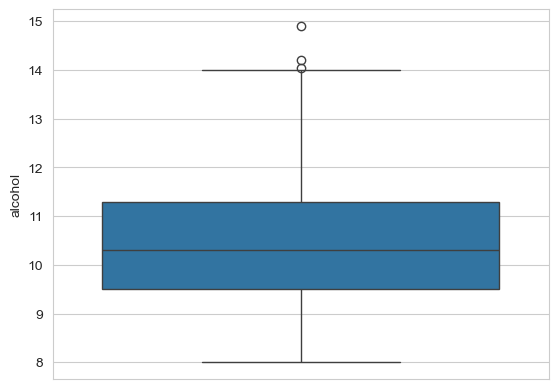

In [63]:
sns.boxplot(y=df['alcohol'])

In [64]:
# 2. Separated features into numerical features versus categorical

#categorical featues are: type, pHValue, and good_taste




numerical_features = df2[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide"\
                          , "total sulfur dioxide", "density", "sulphates", "alcohol"]]
categorical_features = df2[["type", "pHValue", "good_taste"]]


In [65]:
# 3. Normalize numerical features if needed

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
normalized_df = scaler.fit_transform(numerical_features)
normalized_df = pd.DataFrame(normalized_df, index = df2.index, columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar" \
                                                                , "chlorides", "free sulfur dioxide" \
                                                                , "total sulfur dioxide", "density", "sulphates", "alcohol"])

print(numerical_features.shape)
numerical_features.head() # total sulfur dioxide is in hundreds while volatile density & sulphates is decimals

(6487, 10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9


In [66]:
print(normalized_df.shape)
normalized_df.head() # After Normalization

(6487, 10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,-0.165214,-0.423239,0.291542,3.246976,-0.322027,0.830685,0.963956,2.140882,-0.556448,-1.418368
1,-0.705075,-0.240066,0.152230,-0.816526,-0.203117,-0.944951,0.289534,-0.233717,-0.279127,-0.831403
2,0.683140,-0.362181,0.570166,0.311042,-0.173389,-0.028494,-0.331645,0.139434,-0.625778,-0.328290
3,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994
4,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994


In [67]:
# 4. Use one-hot encoding to take care of categorical variables

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_1hot_array = cat_encoder.fit_transform(categorical_features[['type', 'pHValue']]).toarray()
column_names = []
for categories in cat_encoder.categories_:
    column_names.extend(categories)
    
cat_1hot_df = pd.DataFrame(cat_1hot_array, columns=column_names)
df2.reset_index(drop=True, inplace=True)
cat_1hot_df.reset_index(drop=True, inplace=True)
normalized_df.reset_index(drop=True, inplace=True)

# Create the 'good taste label'
cat_1hot_df['good_taste_label'] = df2['good_taste'].apply(lambda x: 0 if x == "No" else 1)
cat_1hot_df.isnull().any()


df3 = pd.concat([normalized_df, cat_1hot_df], axis=1)
df3.head(20)




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,red,white,acidic,extremly acidic,lightly acidic,midly acidic,quite acidic,very acidic,good_taste_label
0,-0.165214,-0.423239,0.291542,3.246976,-0.322027,0.830685,0.963956,2.140882,-0.556448,-1.418368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.705075,-0.240066,0.152230,-0.816526,-0.203117,-0.944951,0.289534,-0.233717,-0.279127,-0.831403,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.683140,-0.362181,0.570166,0.311042,-0.173389,-0.028494,-0.331645,0.139434,-0.625778,-0.328290,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,0.683140,-0.362181,0.570166,0.311042,-0.173389,-0.028494,-0.331645,0.139434,-0.625778,-0.328290,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
6,-0.782198,-0.117950,-1.101580,0.332317,-0.322027,-0.028494,0.360525,0.071589,-0.417787,-0.747551,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7,-0.165214,-0.423239,0.291542,3.246976,-0.322027,0.830685,0.963956,2.140882,-0.556448,-1.418368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,-0.705075,-0.240066,0.152230,-0.816526,-0.203117,-0.944951,0.289534,-0.233717,-0.279127,-0.831403,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9,0.683140,-0.728527,0.779135,-0.837801,-0.351755,-0.143051,0.236290,-0.301562,-0.556448,0.426379,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [68]:
# 5. Separated data set into training and testing

X = df3.drop('good_taste_label',axis=1)
Y = df3['good_taste_label']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [69]:
# 6. Build a logistic model using all features

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

In [70]:
# 7. examine the performance of your model

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1561
           1       0.58      0.27      0.37       386

    accuracy                           0.82      1947
   macro avg       0.71      0.61      0.63      1947
weighted avg       0.79      0.82      0.79      1947

0.8171545968156138


In [71]:
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,red,white,acidic,extremly acidic,lightly acidic,midly acidic,quite acidic,very acidic,good_taste_label
0,-0.165214,-0.423239,0.291542,3.246976,-0.322027,0.830685,0.963956,2.140882,-0.556448,-1.418368,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.705075,-0.240066,0.152230,-0.816526,-0.203117,-0.944951,0.289534,-0.233717,-0.279127,-0.831403,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.683140,-0.362181,0.570166,0.311042,-0.173389,-0.028494,-0.331645,0.139434,-0.625778,-0.328290,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.010967,-0.667469,0.012918,0.651440,0.064432,0.945242,1.247924,0.309049,-0.903099,-0.495994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


Trial 0, R-squared: -0.11627106983144131,  
Trial 1, R-squared: -0.11279074243203646,  
Trial 2, R-squared: -0.20501628537436845,  
Trial 3, R-squared: -0.21749151036940884,  
Trial 4, R-squared: -0.13329045656571492,  
Trial 5, R-squared: -0.13166010963502206,  
Trial 6, R-squared: -0.0899712092130518,  
Trial 7, R-squared: -0.16423664122137405,  
Trial 8, R-squared: -0.09010371570525577,  
Trial 9, R-squared: -0.1434965810940496,  


<Axes: xlabel='trial'>

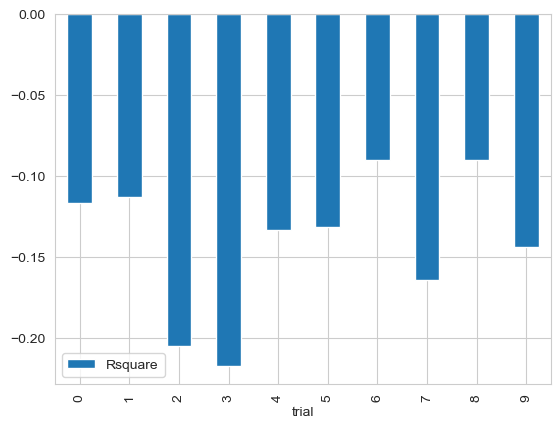

In [72]:
# 8. check if your model passes cross-validations

rsquare = []
for i in range(10):
    X = df3.drop('good_taste_label',axis=1)
    Y = df3['good_taste_label']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  '.format(i, metrics.r2_score(Y_test, Y_pred)))

rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [73]:
# 9. Comment on the results of your model

***White wine and Red wine are different type of wine. Answer the question whether your model will perform better for the white wine or the red wine or similar. You will need to support your arguments by evidence such as separate the dataset and build separate models.***

***Type your code and answers here***